# Portfolio Simulation Modeling

In this notebook, we model stock portfolios.

*Simulation* allows us to *evalute* (approximately) a *function of a random variable*.

<u>**Data Used**</u>
 - <a href="#S">S&P500 Data</a>
 - <a href="#T">T-Bill Data</a>

<u>**Advantages of Simulation**</u>
 - simulation allows us to evaluate (approximately) a function of a random variable (<a href="#E1">Ex.1</a>)
 - simulation enables evaluating and visualizing probability distribution resulting from compounding (<a href="#E2">Ex.2</a>)
 - simulation allows incorporating correlations between input variables (<a href="#E3">Ex.3</a>)
 - simulation is a low-cost tool for checking the effect of changing a strategy on an output variable of interest (<a href="#E4">Ex.4</a>)

#### Import necessary libraries

In [16]:
import random
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web

%matplotlib inline

## <a name="S"> Import S&P500 Data</a>

In [17]:
start_date = datetime.date(1976,1,1)
end_date = datetime.date(2017,1,1)
# Download S&P 500 index data
try:
    SnP500DF = web.DataReader('^GSPC','yahoo',start_date,end_date)
except:
    SnP500DF = pd.read_csv("http://analytics.romanko.ca/data/SP500_hist.csv")
    SnP500DF.index = pd.to_datetime(SnP500DF.Date)
SnP500DF.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1976-01-02,1976-01-02,90.190002,91.180000,89.809998,90.900002,90.900002,10300000
1976-01-05,1976-01-05,90.900002,92.839996,90.849998,92.580002,92.580002,21960000
1976-01-06,1976-01-06,92.580002,94.180000,92.370003,93.529999,93.529999,31270000
1976-01-07,1976-01-07,93.529999,95.150002,92.910004,93.949997,93.949997,33170000
1976-01-08,1976-01-08,93.949997,95.470001,93.410004,94.580002,94.580002,29030000


#### Drop data column

In [18]:
# Drop date column
SnP500DF.drop(['Date'],axis=1,inplace=True)

SnP500DF.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1976-01-02,90.190002,91.180000,89.809998,90.900002,90.900002,10300000
1976-01-05,90.900002,92.839996,90.849998,92.580002,92.580002,21960000
1976-01-06,92.580002,94.180000,92.370003,93.529999,93.529999,31270000
1976-01-07,93.529999,95.150002,92.910004,93.949997,93.949997,33170000
1976-01-08,93.949997,95.470001,93.410004,94.580002,94.580002,29030000


#### Function to convert value into float

In [19]:
def toFloat(x):
    if x == 'null':
        return np.nan
    return float(x)

#### Transform daily data into annual data:

In [20]:
# Create a time-series of annual data points from daily data
SnP500DF = SnP500DF.resample('A').last()
SnP500DF.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,1402.430054,1426.739990,1398.109985,1426.189941,1426.189941,3204330000
2013-12-31,1842.609985,1849.439941,1842.410034,1848.359985,1848.359985,2312840000
2014-12-31,2082.110107,2085.580078,2057.939941,2058.899902,2058.899902,2606070000
2015-12-31,2060.590088,2062.540039,2043.619995,2043.939941,2043.939941,2655330000
2016-12-31,2251.610107,2253.580078,2233.620117,2238.830078,2238.830078,2670900000


#### Compute annual return of S&P 500 index:

In [21]:
# Convert column to float
SnP500DF['Adj Close'] = SnP500DF['Adj Close'].apply(toFloat)

# Compute return (divide by previous years and subtract 1)
SnP500DF['Returns'] = SnP500DF['Adj Close'] / SnP500DF['Adj Close'].shift(1) - 1

# Drop null data
SnP500DF = SnP500DF.dropna()

SnP500DF.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
1977-12-31,94.940002,95.669998,94.440002,95.099998,95.099998,23560000,-0.115020
1978-12-31,96.279999,97.029999,95.480003,96.110001,96.110001,30030000,0.010620
1979-12-31,107.839996,108.529999,107.260002,107.940002,107.940002,31530000,0.123088
1980-12-31,135.330002,136.759995,134.289993,135.759995,135.759995,41210000,0.257736
1981-12-31,122.300003,123.419998,121.570000,122.550003,122.550003,40780000,-0.097304


#### Compute average annual return and standard deviation of return for S&P 500 index:

In [22]:
SnP500_mean_rtn = SnP500DF['Returns'].mean()
SnP500_std_rtn = SnP500DF['Returns'].std()

print ("S&P 500 Average Return: {}% (St. Dev: {}%)".format(
                                                        round(100*SnP500_mean_rtn,2),
                                                        round(100*SnP500_std_rtn),2))

S&P 500 Average Return: 9.13% (St. Dev: 16%)


## <a name="T">Import T-Bill Data</a>

#### Download US Treasury bill data from Federal Reserve:

In [23]:
startDate = datetime.date(1977,1,1)
endDate = datetime.date(2017,1,1)

TBillDF = web.DataReader('DTB3','fred',startDate,endDate)
TBillDF.head()

,DTB3
DATE,
1977-01-03,4.39
1977-01-04,4.49
1977-01-05,4.47
1977-01-06,4.50
1977-01-07,4.62


In [24]:
#### Transform daily data into annual data:

In [25]:
TBillDF = TBillDF.resample('A').last()
TBillDF.head()

,DTB3
DATE,
1977-12-31,6.13
1978-12-31,9.26
1979-12-31,12.04
1980-12-31,14.30
1981-12-31,11.08


#### Compute annual return of T-Bills:

In [26]:
TBillDF['Returns'] = TBillDF['DTB3'] / 100

# Drop null data
TBillDF = TBillDF.dropna()

TBillDF.head()

,DTB3,Returns
DATE,,
1977-12-31,6.13,0.0613
1978-12-31,9.26,0.0926
1979-12-31,12.04,0.1204
1980-12-31,14.30,0.1430
1981-12-31,11.08,0.1108


#### Compute average annual return and standard deviation of return for T-Bills:

In [27]:
TBill_mean_rtn = TBillDF['Returns'].mean()
TBill_std_rtn = TBillDF['Returns'].std()

print ("TBill Average Return: {}% (St. Dev: {}%)".format(
                                                        round(100*TBill_mean_rtn,2),
                                                        round(100*TBill_std_rtn),2))

TBill Average Return: 4.58% (St. Dev: 4%)


## <a name="E1">Simulation Example 1</a>

We want to invest \$1000 in the US stock market for 1 year. We chose to invest in the S&P500 market index.

Our initial capital is: $v_0 = 1000$

The value of our investment at the end of year 1 is $v_1$.

The market return over this time period $[0,1)$ is $r_{0,1}$

We can compute $v_1$ with the following formula:
    $v_1 = v_0 + r_{0,1} \cdot v_0 = (1+r_{0,1})v_0$
    
This example illustrates a *very basic Monte Carlo simulation system* where we can use simulation to evaluate (approximately) a function of a random variable ($v_1$).

In [28]:
v0 = 1000 # Initial capital

We then simulate our return over several years using the **Monte Carlo** method. We assume that the return of the market over the next year follow Normal distribution.

Between 1977 and 2016, S&P 500 returned 9.13% per year on average with a standard deviation of 16.0%.

Generate 100 scenarios for the market return over the next year (draw 100 random numbers from a Normal distribution with mean 9.13% and standard deviation of 16.0%):

### Predict Returns with Monte Carlo

In [29]:
Ns = 100 # Number of scenarios
r01 = np.random.normal(SnP500_mean_rtn, SnP500_std_rtn, Ns)

### Calculate Potential Value of Investment After 1 Year

Now we can calculate potential values of our investment after 1 year using: 
    $v_1 = v_0 + r_{0,1}\cdot v_0 = (1 + r_{0,1})\cdot v_0$.
    
Given the distribution of $r_{0,1}$, in some cases we can compute the distribution of $v_1$ in closed form. In this case, since $r_{0,1}$ followed a Normal distribution, $v_1$ will also follow a normal distribution with mean $(1+\mu_{0,1})v_0$ and standard deviation $\sigma_{0,1}v_0$

In [30]:
# Distribution of value at the end of year 1
v1 = (r01 + 1) * v0

### Analyze Simulation

#### Statistics

We can compute statistic information regarding the potential value of our investment:

In [31]:
print ("Mean:",np.mean(v1))
print ("Std. Dev:",np.std(v1))
print ("Min:",np.min(v1))
print ("Max:",np.max(v1))

#Percentiles:
percentiles = np.percentile(v1, [5,90,95])
print ("5th Percentile:",percentiles[0])
print ("Median:",percentiles[1])
print ("95th Percentile:",percentiles[2])

Mean: 1066.03767571
Std. Dev: 143.738350918
Min: 722.985070835
Max: 1441.77158658
5th Percentile: 861.95089244
Median: 1245.4626364
95th Percentile: 1303.54973441


#### Plot histogram
Plot a histogram of the distribution of outcomes for v1:

Text(0.5,1,'v_1 Histogram')

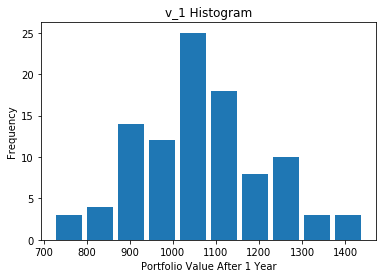

In [32]:
hist, bins = np.histogram(v1)
positions = (bins[:-1] + bins[1:]) / 2
plt.bar(positions, hist, width=60)
plt.xlabel('Portfolio Value After 1 Year')
plt.ylabel('Frequency')
plt.title('v_1 Histogram')

#### Plot simulated value paths

Simulated paths over time:

Text(0.5,1,'Simulated Value Paths')

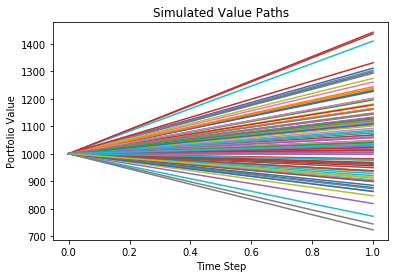

In [33]:
# Plot simulated paths over time
for res in v1:
    plt.plot((0,1), (v0, res))
plt.xlabel('Time Step')
plt.ylabel('Portfolio Value')
plt.title("Simulated Value Paths")

In this example, we evaluated the $v_1$ equation using simulation. This equation would have been much harder to simulate if $r_{0,1}$ did not follow a normal distribution, or if the output variable $v_1$ were a more complex function of the input variable $r_{0,1}$.

## <a name="E2">Simulation Example 2</a>

We want to invest \$1000 in the US stock market for the next 30 years. We chose to invest in the S&P500 market index.

We still assume that every year your investment returns from investing into the S&P500 will follow a Normal distribution with the mean and standard deviation presented in Ex.1.

Our initial capital is : $v_0 = 1000$

The value of our investment at the end of year 30 is $v_{30}$.

The market return over 30 years will depend on the realization of 30 random variables:

 $v_{30} = (1+r_{0,1})\cdot(1+r_{1,2})\cdot...\cdot (1+r_{29,30}) v_0$

The market return over this time period $[0,t)$ is $r_{0,t} = (1+r_{0,1})\cdot(1+r_{1,2})\cdot...\cdot (1+r_{t-1,t}) - 1$

We can compute $v_{0,t}$ with the following formula:
    $v_{0,t} = (1+r_{t-1,t})v_0$
    
This example illustrates how we can use simulation to visualize probability distributions resulting from compounding probability distributions of multiple input variables.

In [34]:
v0 = 1000 # Initial capital

### Predict Returns with Monte Carlo

Between 1977 and 2016, S&P 500 returned 9.13% per year on average with a standard deviation of 16.0%.
Simulate 30 columns of 100 observations each of single period returns:

In [35]:
r_speriod30  = np.random.normal(SnP500_mean_rtn, SnP500_std_rtn, (Ns, 30))

### Calculate Potential Value of Investment After 30 Years

In [36]:
v30 = np.prod(1 + r_speriod30 , 1) * v0

### Analyze Simulation
#### Plot histogram

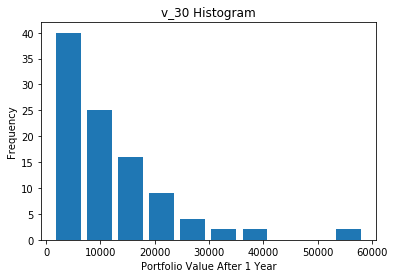

In [37]:
hist, bins = np.histogram(v30)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.xlabel('Portfolio Value After 1 Year')
plt.ylabel('Frequency')
plt.title('v_30 Histogram')
plt.show()

#### Plot simulated value paths

Simulated paths over time:

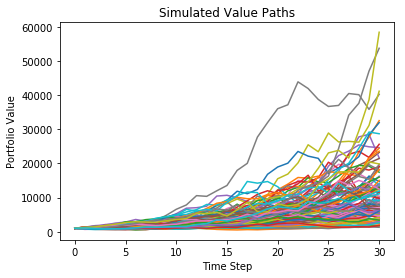

In [38]:
for scenario in r_speriod30:
    y = [np.prod(1 + scenario[0:i]) * v0 for i in range(0,31)]
    plt.plot(range(0,31), y)
plt.xlabel('Time Step')
plt.ylabel('Portfolio Value')
plt.title("Simulated Value Paths")
plt.show()

## <a name="E3">Simulation Example 3</a>

We are planning for *retirement* and decide to *invest in the market* for the next *30 years*.

Our initial capital is : $v_0 = 1000$

We have the opportunity to invest in *stocks* and *Treasury bonds*:
 - allocate 50% of our capital to the stock market (S&P 500 index fund) today
 - allocate 50% of our capital to bonds today
 
We assume that our investment returns from investing in the S&P500 and Treasury bonds will follow a Normal distribution with the mean and standard deviations shown above. We also assume a correlation of $-0.2$ between the stock market and the Treasury bond market.

The value of our investment at the end of year 30 is $v_{30}$.
    
This example illustrates how we can use simulation to incorporate correlations between input variables.

### Compute Covariance Matrix:

In [39]:
covMat = np.cov(np.array(SnP500DF['Returns']),np.array(TBillDF['Returns']),rowvar=0)
covMat

array([[ 0.024987  ,  0.00080272],
       [ 0.00080272,  0.00133127]])

### Predict Returns with Monte Carlo

In [40]:
v0 = 1000 # Initial capital
Ns = 5000 # Number of scenarios

In [41]:
mu = [SnP500_mean_rtn, TBill_mean_rtn] # Expected return
mu

[0.09130311413356888, 0.04584499999999999]

In [42]:
stockRet = np.ones(Ns)
bondsRet = np.ones(Ns)

In [43]:
scenarios = np.random.multivariate_normal(mu, covMat, Ns)
for year in range(1, 31):
    scenarios = np.random.multivariate_normal(mu, covMat, Ns)
    stockRet *= (1 + scenarios[:,0])
    bondsRet *= (1 + scenarios[:,1])

### Calculate Potential Value of Investment After 30 Years

In [44]:
v30 = 0.5 * v0 * stockRet + 0.5 * v0 * bondsRet

### Analyze Simulation
#### Plot histogram

Text(0,0.5,'frequency')

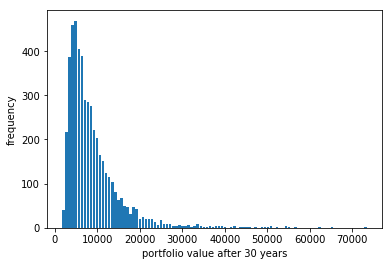

In [45]:
hist, bins = np.histogram(v30, bins = 100)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.xlabel('portfolio value after 30 years')
plt.ylabel('frequency')

## <a name="E4">Simulation Example 4</a>

We use the scenario generation procedure from <a href="#E3">Ex. 3</a> to compare 2 portfolios:
 - *Strategy A*: 50-50 portfolio allocation in stocks and bonds
 - *Strategy B*: 30-70 portfolio allocation in stocks and bonds
 
Our initial capital is : $v_0 = 1000$

We want to compute and plot:
$v_{30} = w_s v_0(1 + r^s_{0,30}) + w_b v_0(1 + r^b_{0,30})$

We still assume that our investment returns from investing in the S&P500 and Treasury bonds will follow a Normal distribution with the mean and standard deviations shown above. We also assume a correlation of $-0.2$ between the stock market and the Treasury bond market.

The value of our investment at the end of year 30 is $v_{30}$.
    
This example illustrates how we can use simulation for checking the effect of changing a strategy on an output variable of interest.

### Compute Potential Portfolios
Compute portfolios by iterating through different combinations of weights

In [46]:
v30comp = []
for w in np.arange(0.2, 1.01, 0.2):
    v30comp += [w * v0 * stockRet + (1 - w) * v0 * bondsRet]

### Visualize histogram
Plot a histogram of the distribution of differences in outcomes for $v_{30}$ 

E.g. (Strategy 4 - Strategy 2)

In [47]:
v30d = v30comp[3] - v30comp[1]

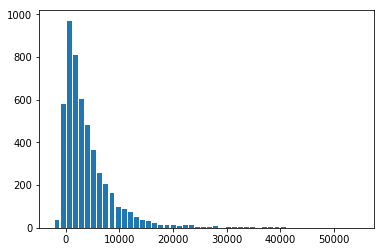

In [48]:
hist, bins = np.histogram(v30d, bins = 50)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.show()

### Compare the strategies
Compute the number of times in v30d that are greater than 0 and less than 0. This corresponds with the number of times the fourth strategy was better than the second strategy and worse, respectively.

In [49]:
# Compute number of elements in v30d that are > 0 and < 0 and compare
pos_count = (v30d > 0).sum()
neg_count = (v30d <= 0).sum()

print ("Strategy 4 was better in %d cases, and Strategy 2 was better in %d cases. "
       "The difference is %d cases" % (pos_count, neg_count, pos_count-neg_count))

Strategy 4 was better in 4426 cases, and Strategy 2 was better in 574 cases. The difference is 3852 cases
